In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-dataset/sample_submission.csv
/kaggle/input/house-prices-dataset/data_description.txt
/kaggle/input/house-prices-dataset/train.csv
/kaggle/input/house-prices-dataset/test.csv


In [72]:
test_df = pd.read_csv("/kaggle/input/house-prices-dataset/train.csv")
train_df = pd.read_csv("/kaggle/input/house-prices-dataset/train.csv")

In [73]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [74]:
train_df.shape ### colonne + ligne 

(1460, 81)

In [75]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [76]:
train_df.info() ###voir les valeur manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
print(train_df.isna().sum()/len(train_df)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [78]:
tmp_na = (train_df.isna().sum()/len(train_df))*100
print(tmp_na)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [79]:
tmp_na[tmp_na > 50]

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [80]:
drop_columns=tmp_na[tmp_na > 50].index.tolist()

In [81]:
drop_columns

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [82]:
train_df.drop(columns=drop_columns,inplace=True)

In [83]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [84]:
datatna=train_df.isna().sum()
datatna[datatna>0].index.tolist()


['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [85]:
datatna=train_df.isna().any()

In [86]:
train_df.isna().any()[train_df.isna().any()==True].index.tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [87]:
na_cols= train_df.isna().any()[train_df.isna().any()==True].index.tolist()
na_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [88]:
##train_df["LotFrontage"].fillna("median")

In [89]:
train_df["LotFrontage"].fillna(train_df["LotFrontage"].median(),inplace=True)


/tmp/ipykernel_37/376100190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["LotFrontage"].fillna(train_df["LotFrontage"].median(),inplace=True)


In [90]:
##train_df["LotFrontage"].median()

In [91]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [92]:
train_df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<Axes: >

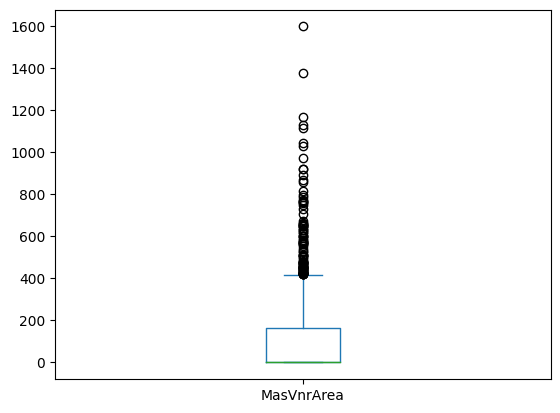

In [93]:
train_df["MasVnrArea"].plot.box()

In [94]:
train_df["MasVnrArea"].fillna(0,inplace=True)

In [95]:
train_df["MasVnrArea"].isna().sum()

0

In [96]:
train_df["BsmtQual"].mode() ###valeur plus frequente

0    TA
Name: BsmtQual, dtype: object

In [97]:
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [98]:
train_df["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [99]:
train_df["BsmtQual"].fillna(method='ffill',inplace=True)

/tmp/ipykernel_37/3014653710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtQual"].fillna(method='ffill',inplace=True)
/tmp/ipykernel_37/3014653710.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df["BsmtQual"].fillna(method='ffill',inplace=True)


In [100]:
train_df["BsmtQual"].ffill(inplace=True)

In [101]:
train_df["BsmtQual"].isna().sum()

0

In [102]:
train_df["BsmtCond"].unique()
train_df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [103]:
train_df["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [104]:
train_df["YearBuilt"].unique()
train_df["YearBuilt"].value_counts()



quartiles = pd.qcut(train_df['YearBuilt'], q=4, labels=["PO", "FA", "TA", "GD"])

print(quartiles)

### max et GD :100% a 75%
### max et GD :75%% a 50%
### max et GD :50% a 25%
### max et GD :25% a min%




0       GD
1       TA
2       GD
3       PO
4       TA
        ..
1455    TA
1456    TA
1457    PO
1458    PO
1459    FA
Name: YearBuilt, Length: 1460, dtype: category
Categories (4, object): ['PO' < 'FA' < 'TA' < 'GD']


In [105]:
train_df['BsmtCond'].fillna(quartiles,inplace=True)


/tmp/ipykernel_37/2210001539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna(quartiles,inplace=True)


In [106]:
train_df["BsmtCond"].isna().sum()

0

In [107]:
train_df.BsmtCond.value_counts()

BsmtCond
TA    1317
Gd      65
Fa      45
PO      18
FA      12
Po       2
GD       1
Name: count, dtype: int64

In [108]:
train_df.isna().sum()[train_df.isna().sum()>0]

BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [109]:
train_df.drop("FireplaceQu",axis=1,inplace=True)

In [110]:
train_df.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [111]:
train_df["Electrical"].fillna(train_df.Electrical.mode()[0],inplace=True)

/tmp/ipykernel_37/3237576996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Electrical"].fillna(train_df.Electrical.mode()[0],inplace=True)


In [112]:
train_df.Electrical.value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [113]:
train_df.dropna(axis=0,inplace=True)

In [114]:
train_df.shape


(1347, 75)

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1347 non-null   int64  
 1   MSSubClass     1347 non-null   int64  
 2   MSZoning       1347 non-null   object 
 3   LotFrontage    1347 non-null   float64
 4   LotArea        1347 non-null   int64  
 5   Street         1347 non-null   object 
 6   LotShape       1347 non-null   object 
 7   LandContour    1347 non-null   object 
 8   Utilities      1347 non-null   object 
 9   LotConfig      1347 non-null   object 
 10  LandSlope      1347 non-null   object 
 11  Neighborhood   1347 non-null   object 
 12  Condition1     1347 non-null   object 
 13  Condition2     1347 non-null   object 
 14  BldgType       1347 non-null   object 
 15  HouseStyle     1347 non-null   object 
 16  OverallQual    1347 non-null   int64  
 17  OverallCond    1347 non-null   int64  
 18  YearBuilt    

In [116]:
cal_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
cal_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

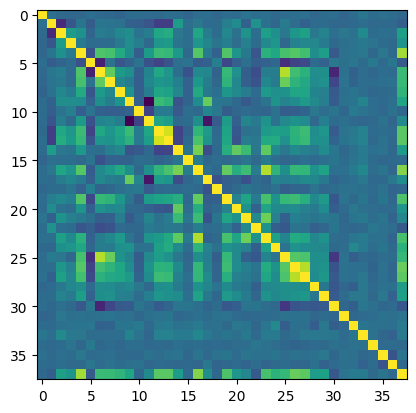

In [117]:
import matplotlib.pyplot as plt

corr_mat = train_df.corr(numeric_only=True)
plt.figure()
plt.imshow(corr_mat)




In [118]:
train_df.LotFrontage.value_counts()

LotFrontage
69.0     257
60.0     120
80.0      67
70.0      63
75.0      51
        ... 
106.0      1
137.0      1
140.0      1
38.0       1
46.0       1
Name: count, Length: 107, dtype: int64

In [119]:
from sklearn.preprocessing import LabelEncoder



for col in cal_col:
    le = LabelEncoder()
    train_df[col+'_le']= le.fit_transform(train_df[col])


In [120]:
##train_df.iloc[:;20]

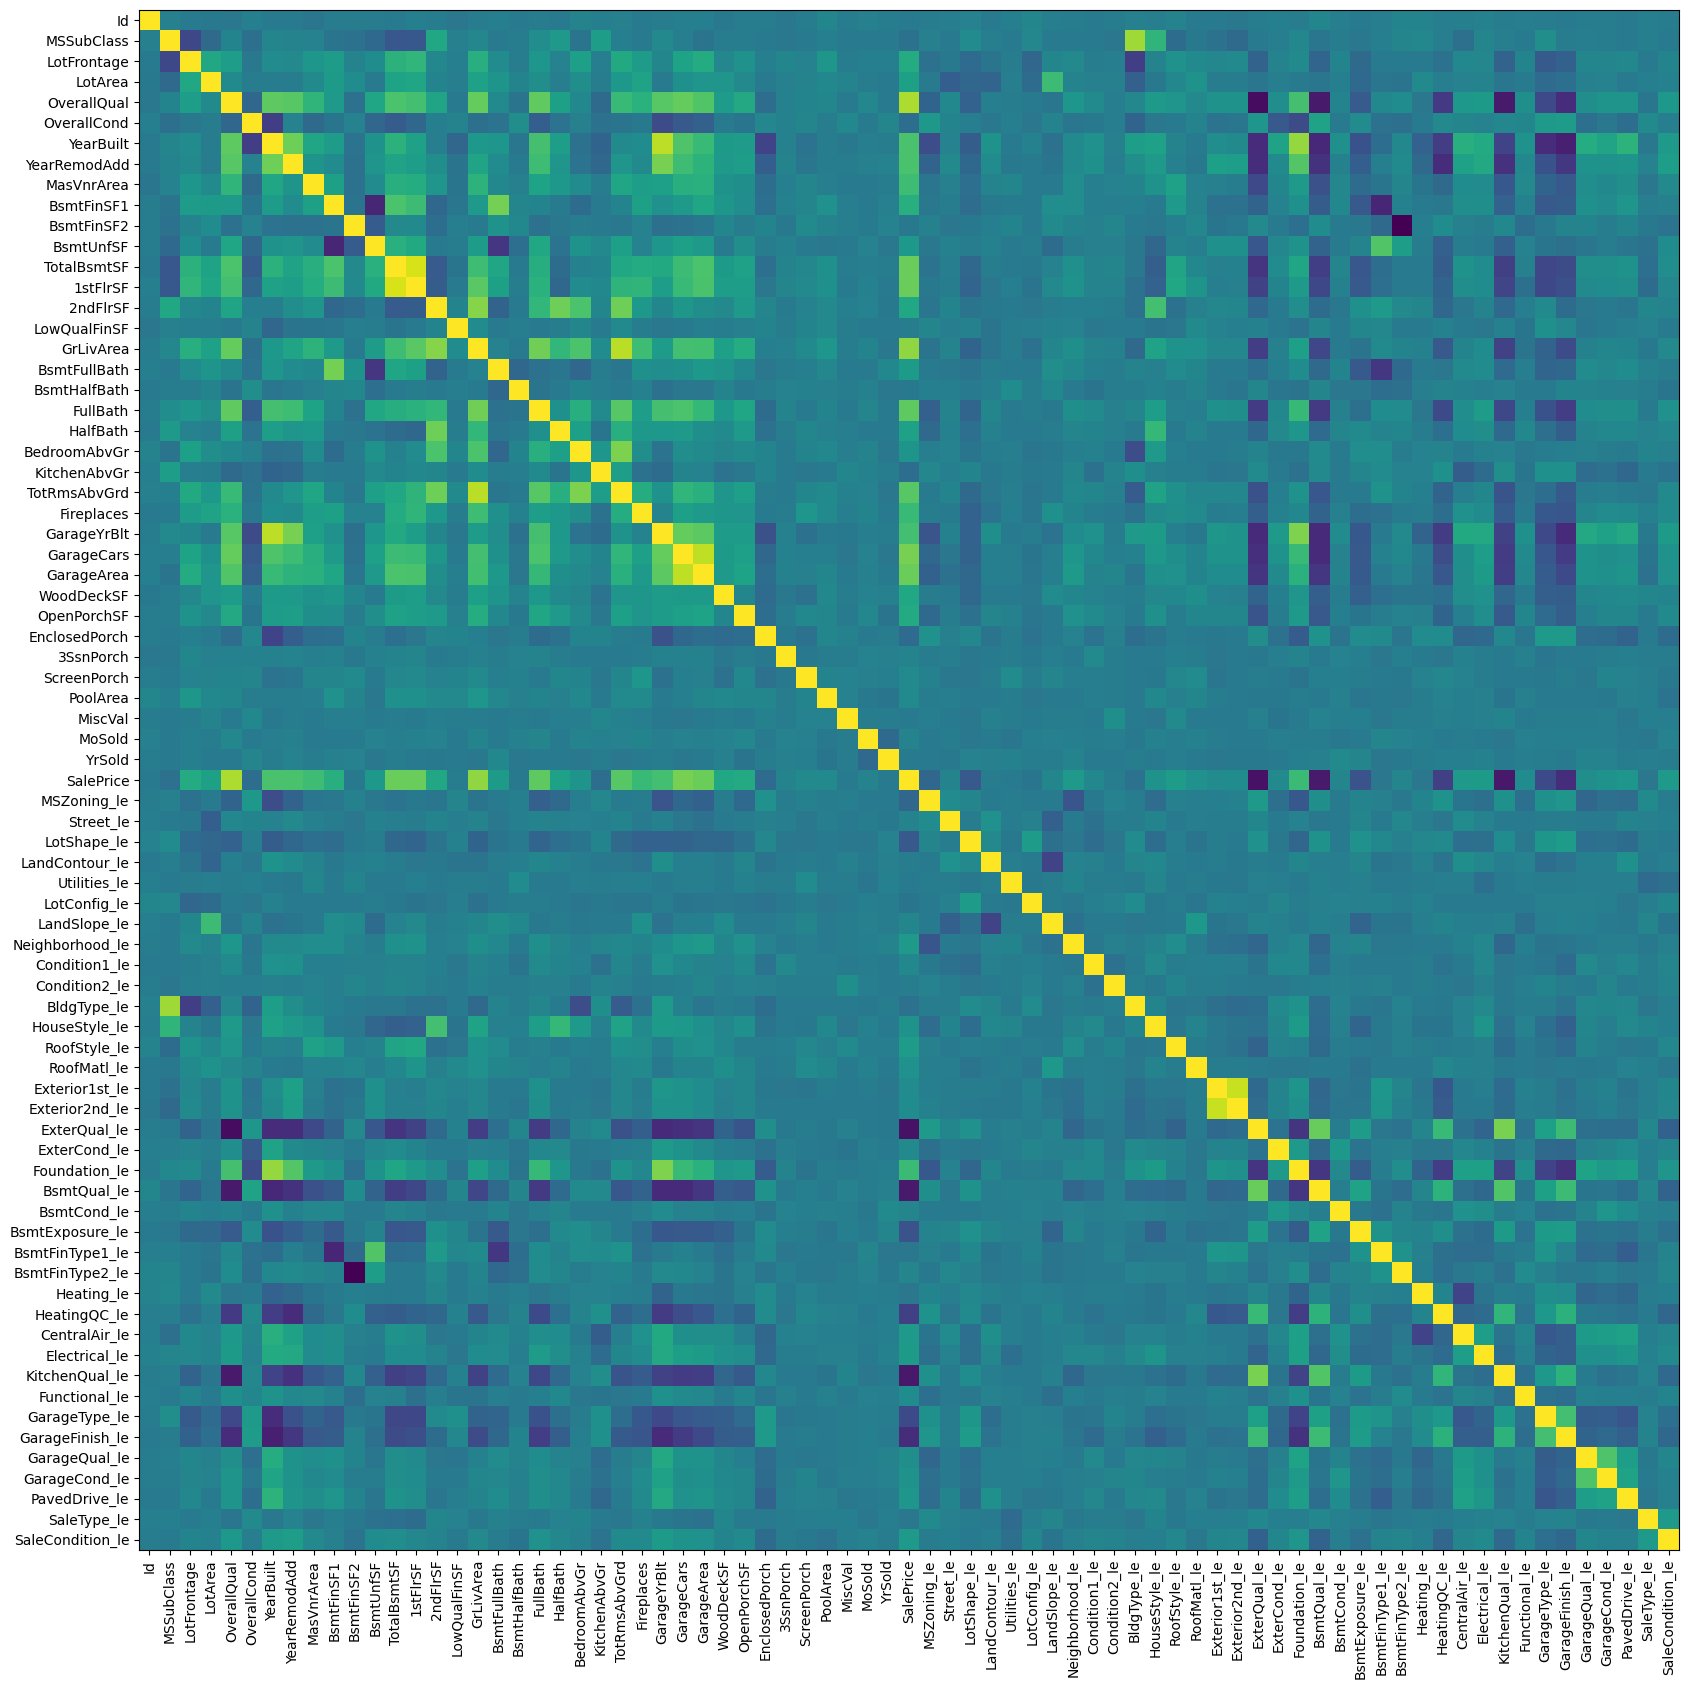

In [121]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = [col for col in train_df.columns if train_df[col].dtype != 'object']
corr_mat = train_df.corr(numeric_only=True)


# Create a figure
plt.figure(figsize=(20, 20))
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)

# Show the plot
plt.show()


In [122]:
corre_score = corr_mat["SalePrice"]

corr_var=corre_score[(corre_score >=0.5)|(corre_score <=-0.5)]

In [123]:
corr_var

oh_columns = [ele.replace("_le","") for ele in corr_var.index if ele.endswith("_le")]
print(oh_columns)

['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish']


In [124]:
pd.get_dummies(train_df[oh_columns])

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False
2,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
3,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True
4,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True
1457,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1458,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True


In [125]:
pd.get_dummies(train_df[oh_columns[0]])

,Ex,Fa,Gd,TA
0,False,False,True,False
1,False,False,False,True
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1455,False,False,False,True
1456,False,False,False,True
1457,True,False,False,False
1458,False,False,False,True


In [126]:
for col in oh_columns:
    train_df = pd.concat([
        train_df,
        pd.get_dummies(train_df[col], dtype='int', prefix=col+'_')
    ], axis=1)




In [127]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__TA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,0,0,0,1,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,1,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,0,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,1


In [128]:
from sklearn.model_selection import train_test_split

quant_vals= corr_var.index[:10].tolist()

In [129]:
cat_vals = [[ele for ele in train_df.columns if ele.startswith(col + '__')] for col in oh_columns]

cat_vals

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [130]:
[ele for ele in cat_vals]

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [131]:
cat_vals

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [132]:

import numpy as np

cat_vals = np.concatenate([ele for ele in cat_vals]).tolist() 
cat_vals



['ExterQual__Ex',
 'ExterQual__Fa',
 'ExterQual__Gd',
 'ExterQual__TA',
 'BsmtQual__Ex',
 'BsmtQual__Fa',
 'BsmtQual__Gd',
 'BsmtQual__TA',
 'KitchenQual__Ex',
 'KitchenQual__Fa',
 'KitchenQual__Gd',
 'KitchenQual__TA',
 'GarageFinish__Fin',
 'GarageFinish__RFn',
 'GarageFinish__Unf']

In [133]:
inputs_cols = quant_vals + cat_vals
inputs_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'ExterQual__Ex',
 'ExterQual__Fa',
 'ExterQual__Gd',
 'ExterQual__TA',
 'BsmtQual__Ex',
 'BsmtQual__Fa',
 'BsmtQual__Gd',
 'BsmtQual__TA',
 'KitchenQual__Ex',
 'KitchenQual__Fa',
 'KitchenQual__Gd',
 'KitchenQual__TA',
 'GarageFinish__Fin',
 'GarageFinish__RFn',
 'GarageFinish__Unf']

In [134]:
from sklearn.model_selection import train_test_split

X = train_df[inputs_cols].values

y = train_df['SalePrice'].values

X.shape, y.shape


((1347, 25), (1347,))

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [136]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((942, 25), (405, 25), (942,), (405,))

##################################################
Model in progress: reg_lin


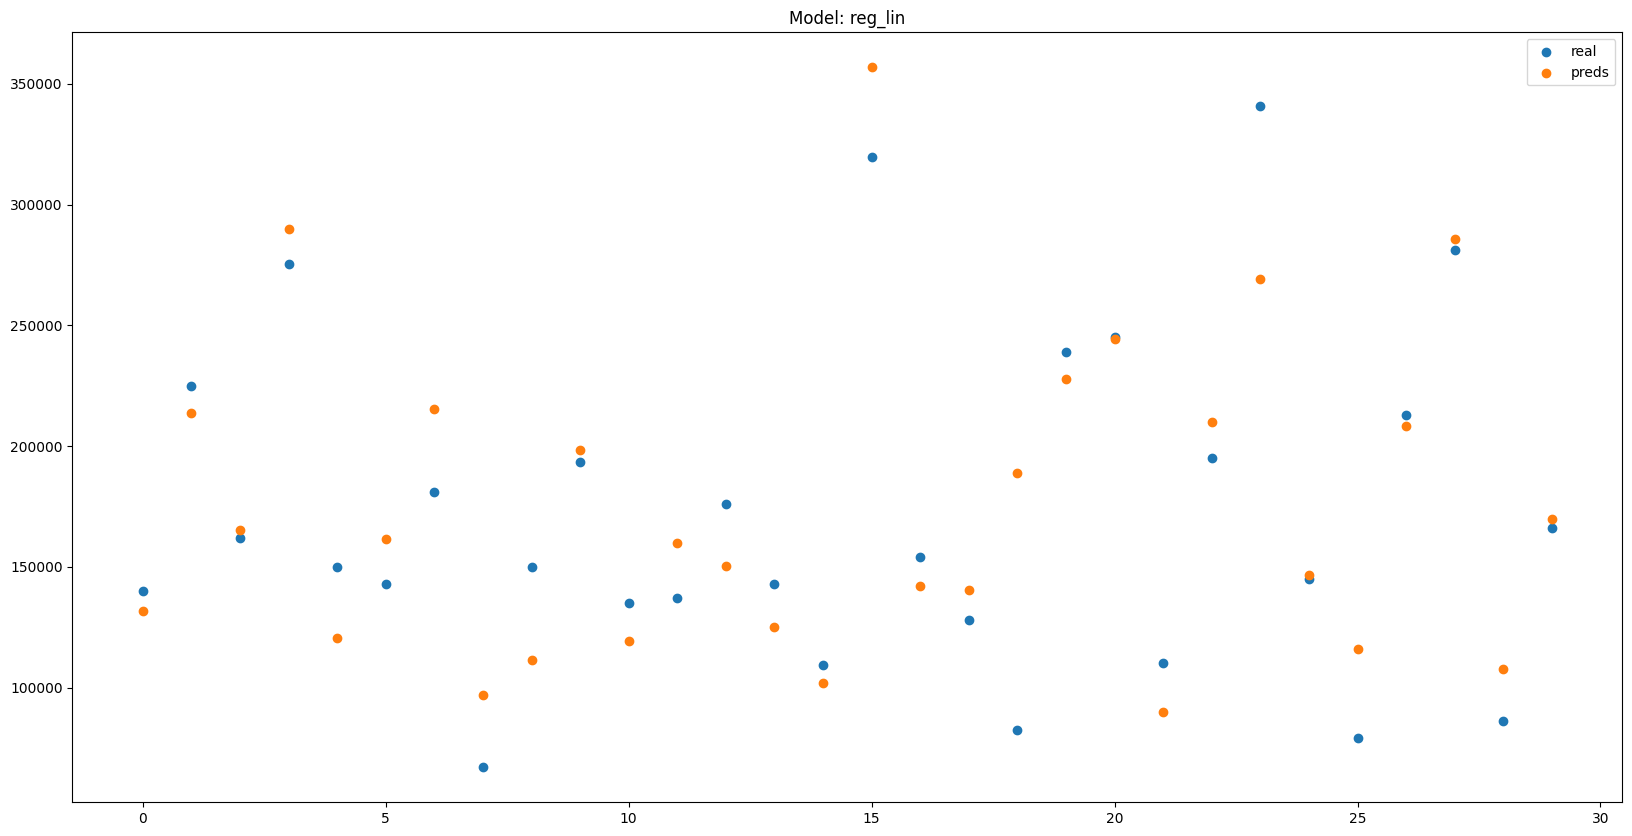

##################################################
Model in progress: rand_for


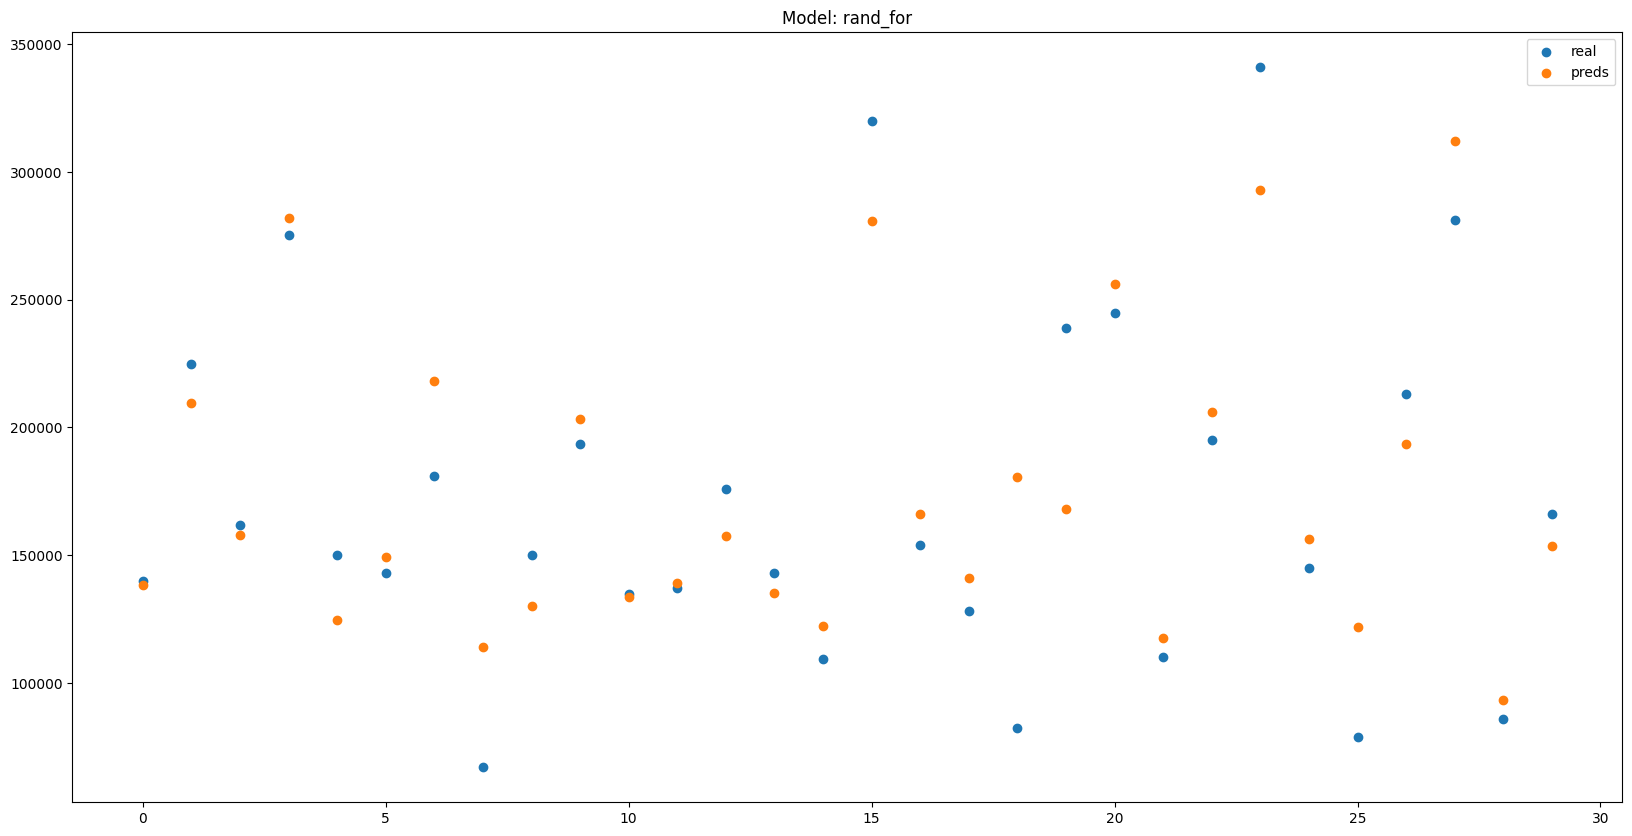

##################################################
Model in progress: SVR


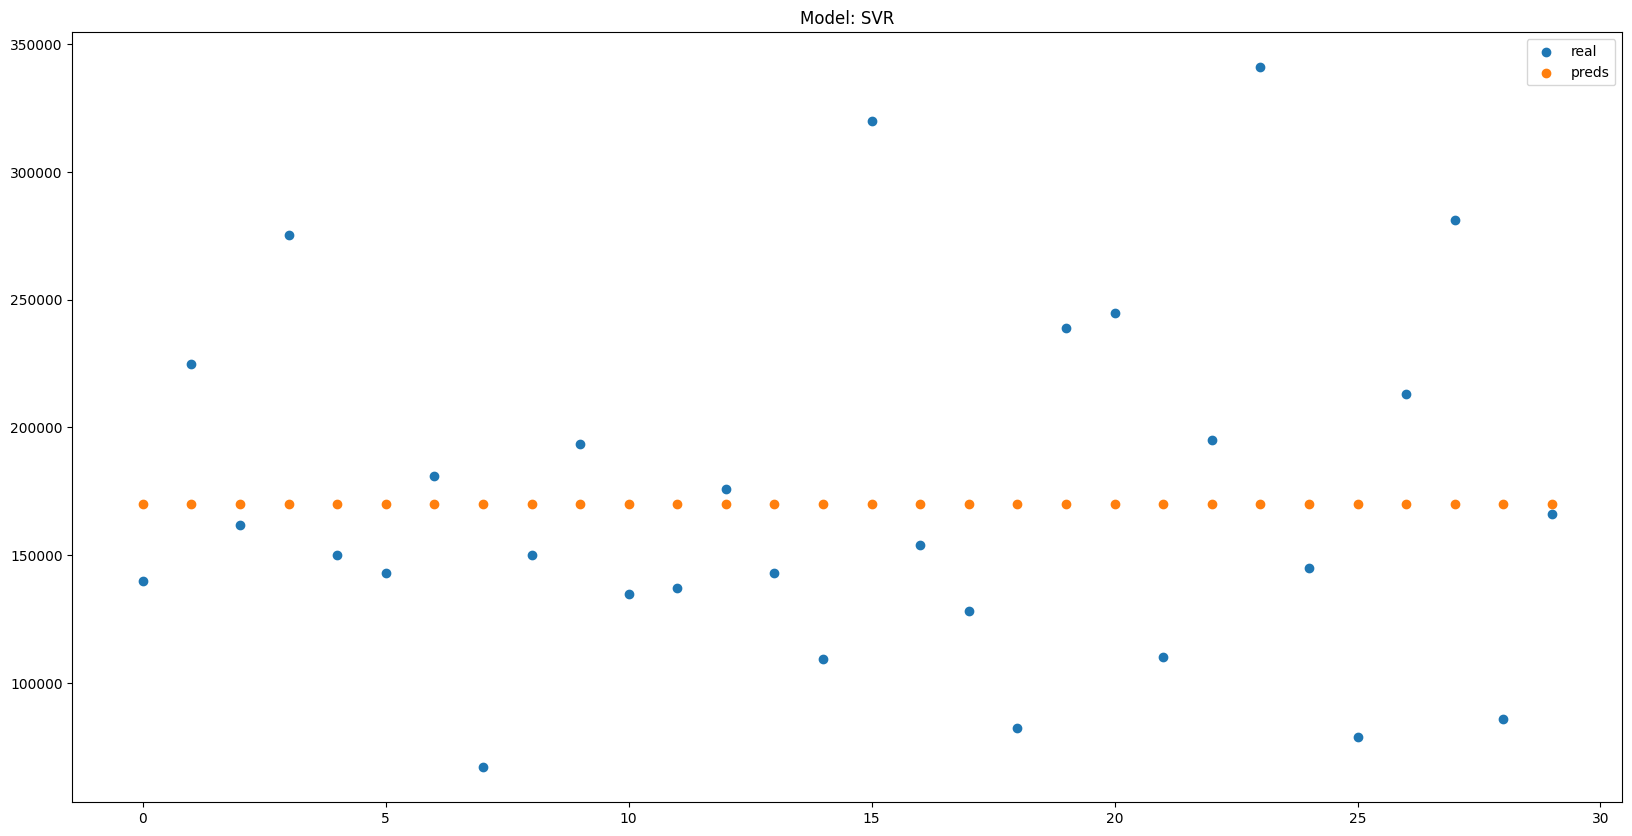

      model        R2           MAE           MSE
0   reg_lin  0.756025  22876.433326  1.372436e+09
0  rand_for  0.767227  20505.515706  1.309419e+09
0       SVR -0.035666  52800.878622  5.825947e+09


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "reg_lin": LinearRegression(),
    "rand_for": RandomForestRegressor(),
    "SVR": SVR()
}

scores_df = pd.DataFrame()

for model_name, model in models.items():
    print("#" * 50)
    print("Model in progress:", model_name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    scores_df = pd.concat([
        scores_df,
        pd.DataFrame({
            "model": [model_name],
            "R2": [r2],
            "MAE": [mae],
            "MSE": [mse]
        })
    ], axis=0)
    
    plt.figure(figsize=(20, 10))
    plt.scatter(x=range(30), y=y_test[:30], label='real')
    plt.scatter(x=range(30), y=predictions[:30], label='preds')
    plt.legend()
    plt.title(f"Model: {model_name}")
    plt.show()

print(scores_df)


In [138]:
sorted_scores_df = scores_df.sort_values(by="R2", ascending=False)

print(sorted_scores_df)


      model        R2           MAE           MSE
0  rand_for  0.767227  20505.515706  1.309419e+09
0   reg_lin  0.756025  22876.433326  1.372436e+09
0       SVR -0.035666  52800.878622  5.825947e+09


In [139]:
research_space = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [50, 100, 200]
}

In [140]:

model = RandomForestRegressor()

grid_model = GridSearchCV(model, research_space, verbose=3)

grid_model.fit(X_train, y_train)



NameError: name 'GridSearchCV' is not defined

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_estimator_

In [ ]:
model = RandomForestRegressor()
grid_model = randomizedSearch(model,research_space,verbose=3)
grid_model.fit(X_train,y_train)
predictions = grid_model.predict(X_test)
scores_df = pd.concat([
        scores_df,
        pd.DataFrame({
            "model": [model_name],
            "R2": [r2],
            "MAE": [mae],
            "MSE": [mse]
        })
    ], axis=0)
    
    plt.figure(figsize=(20, 10))
    plt.scatter(x=range(30), y=y_test[:30], label='real')
    plt.scatter(x=range(30), y=predictions[:30], label='preds')
    plt.legend()
    plt.title(f"Model: {model_name}")
    plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

model = RandomForestRegressor()

random_search = RandomizedSearchCV(model, research_space, verbose=3, n_iter=10, random_state=42)

random_search.fit(X_train, y_train)

predictions = random_search.predict(X_test)

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

scores_df = pd.DataFrame()

scores_df = pd.concat([
    scores_df,
    pd.DataFrame({
        "model": ["RandomForestRegressor"],
        "R2": [r2],
        "MAE": [mae],
        "MSE": [mse]
    })
], axis=0)

print(scores_df)

plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='real')
plt.scatter(x=range(30), y=predictions[:30], label='preds')
plt.legend()
plt.title("Model: RandomForestRegressor")
plt.show()


In [ ]:
sorted_scores_df = scores_df.sort_values(by="R2", ascending=False)

print(sorted_scores_df)


In [ ]:
X_train.shape[1]

In [ ]:
X_train.size

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))















model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

scores_df = pd.DataFrame()

scores_df = pd.concat([
    scores_df,
    pd.DataFrame({
        "model": ["Keras MLP"],
        "MAE": [mae],
        "MSE": [mse]
    })
], axis=0)

print(scores_df)

plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='real')
plt.scatter(x=range(30), y=predictions[:30], label='preds')
plt.legend()
plt.title("Model: Keras MLP")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supposons que X et y soient déjà définis
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le modèle séquentiel
model = Sequential()

# Ajouter des couches au modèle
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Calculer les métriques
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# Initialiser un DataFrame vide pour stocker les scores
scores_df = pd.DataFrame()

# Ajouter les scores au DataFrame
scores_df = pd.concat([
    scores_df,
    pd.DataFrame({
        "model": ["Keras MLP"],
        "MAE": [mae],
        "MSE": [mse]
    })
], axis=0)

# Afficher les scores
print(scores_df)

# Afficher les résultats
plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='real')
plt.scatter(x=range(30), y=predictions[:30], label='preds')
plt.legend()
plt.title("Model: Keras MLP")
plt.show()


In [141]:
import keras 
from keras import layers

In [149]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(X_train.shape[1],)),
    layers.Dense(64,activation='tanh'),
    layers.Dense(1)
    
]

)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
model.compile(optimizer="adam",loss="mse",metrics=["r2_score","mae"])

In [148]:
history = model.fit(X_train,y_train,epochs=50,batch_size=32)

plt.figure()
plt.plot(history.history["Loss"])
plt.Show()

plt.figure()
plt.plot(history.history["mae"],label="MAE")
plt.plot(history.history["r2_score"],label="R2")
plt.legend
plt.Show()



Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40140263424.0000 - mae: 185783.0625 - r2_score: -6.2704 
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41765105664.0000 - mae: 188705.5781 - r2_score: -5.9095
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40973717504.0000 - mae: 186618.7031 - r2_score: -5.7308 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45028028416.0000 - mae: 192857.0469 - r2_score: -4.8036 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39690326016.0000 - mae: 182628.0781 - r2_score: -5.3050 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39753269248.0000 - mae: 184730.6406 - r2_score: -6.1566 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40633499648.0000 - mae: 186214.9375 - r2_score: -5.9479
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41054474240.0000 - mae: 186106.2656 - r2_score: -5.4512 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42698137600.0000 - mae: 

KeyError: 'Loss'

<Figure size 640x480 with 0 Axes>